In [6]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
model = ResNet50(weights='imagenet')


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
img_path = 'dog.jpg'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

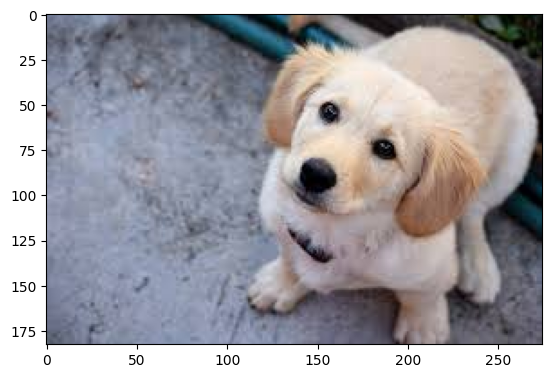

In [5]:
img_plot = mpimg.imread(img_path)
plt.imshow(img_plot)
plt.show()

Setup

In [14]:
# Make a model
layer1 = keras.layers.Dense(3, activation="relu")
model = keras.Sequential([keras.Input(shape=(3,)), layer1])

# Freeze the first layer
layer1.trainable = False

# Keep a copy of the weights of layer1 for later reference
initial_layer1_weights_values = layer1.get_weights()

# Train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))

# Check that the weights of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)
np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.2189
